# Unsupervised Learning Final Project

**This project is the culmination of the Data Science in Python: Unsupervised Learning course, designed to demonstrate the application of key unsupervised learning techniques to a real-world business problem. The notebook is structured into seven sections, each building upon the last to create a comprehensive analysis:**

1. Data Prep & EDA - Exploratory data analysis and preparation to ensure the dataset is clean and ready for modeling.
2. K-Means Clustering - Initial segmentation of the company's employees using K-Means clustering.
3. PCA for Visualization - Applying Principal Component Analysis (PCA) to reduce dimensionality and visualize the employee segments.
4. K-Means Clustering (Round 2) - Refining the clustering process based on insights gained from the initial analysis.
5. PCA for Visualization (Round 2) - Visualizing the improved clustering results after further refinement.
6. EDA on Clusters - Conducting exploratory analysis on the identified clusters to gain deeper insights into employee behavior and characteristics.
7. Make Recommendations - Based on the findings, making strategic recommendations to improve employee retention across different segments.

## 0. Goal & Scope

**GOAL**: You are trying to better understand the company’s different segments of employees and how to increase employee retention within each segment.

**SCOPE**: 
* Clustering: Apply K-Means clustering to segment the employees based on their features.
* Dimensionality Reduction: Utilize PCA to visualize the clusters and gain insights into their structure.
* Recommendations: Analyze the clusters to identify key trends and make tailored recommendations to improve employee retention, ensuring that each segment's specific needs are addressed.

## 1. Data Prep & EDA

### a. Data Prep: Check the data types

The data can be found in the `employee_data.csv` file.

In [1]:
# Import necessary modules for data preparation and EDA

import pandas as pd  # Pandas for data manipulation and DataFrame management
import numpy as np   # NumPy for numerical operations and handling arrays
import seaborn as sns  # Seaborn for data visualization, especially for statistical plots
import matplotlib.pyplot as plt  # Matplotlib for creating static, interactive, and animated visualizations
from sklearn.cluster import KMeans  # KMeans algorithm for clustering
from sklearn.metrics import silhouette_score  # Silhouette score to evaluate cluster quality

In [2]:
# read in the employee data
employee_df = pd.read_csv('../Data/employee_data.csv')
employee_df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [3]:
# note the number of rows and columns
employee_df.shape

(1470, 10)

In [4]:
# view the data types of all the columns
employee_df.info()

# there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         1470 non-null   int64 
 1   Age                1470 non-null   int64 
 2   Gender             1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   JobLevel           1470 non-null   int64 
 5   Department         1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   PerformanceRating  1470 non-null   int64 
 8   JobSatisfaction    1470 non-null   int64 
 9   Attrition          1470 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.0+ KB


In [5]:
# look at the numeric columns
employee_df.describe()

# there are no nonsensical values here nor obvious outliers

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2024.865306,36.923810,9.192517,2.063946,6502.931293,3.153741,2.728571
std,602.024335,9.135373,8.106864,1.106940,4707.956783,0.360824,1.102846
min,1001.000000,18.000000,1.000000,1.000000,1009.000000,3.000000,1.000000
25%,1491.250000,30.000000,2.000000,1.000000,2911.000000,3.000000,2.000000
50%,2020.500000,36.000000,7.000000,2.000000,4919.000000,3.000000,3.000000
75%,2555.750000,43.000000,14.000000,3.000000,8379.000000,3.000000,4.000000
max,3068.000000,60.000000,29.000000,5.000000,19999.000000,4.000000,4.000000


In [6]:
# look at the non-numeric columns
employee_df.Gender.value_counts()

# all values make sense

Gender
Male      882
Female    588
Name: count, dtype: int64

In [7]:
employee_df.Department.value_counts()
# all values make sense

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [8]:
employee_df.Attrition.value_counts()
# all values make sense

Attrition
No     1233
Yes     237
Name: count, dtype: int64

### b. Data Prep: Convert the data types

Use `np.where` and `pd.get_dummies` to create a DataFrame for modeling where all fields are numeric.

In [9]:
# create a copy of the dataframe
emp_prep_df = employee_df.copy()
emp_prep_df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [10]:
# Look at the Gender and Attrition columns
# Since there are only two possible values for Gender (Male/Female) and Attrition (Yes/No), np.where is used for binary conversion

# Modify 'model_df' by adding binary columns for Gender and Attrition using np.where
# 'Gender' is 1 if 'Female', otherwise 0
# 'Attrition' is 1 if 'Yes', otherwise 0
emp_prep_df = emp_prep_df.assign(
    Gender = np.where(emp_prep_df.Gender == 'Female', 1, 0),   
    Attrition = np.where(emp_prep_df.Attrition == 'Yes', 1, 0) 
)

emp_prep_df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,1,1,2,Sales,5993,3,4,1
1,1002,49,0,8,2,Research & Development,5130,4,2,0
2,1004,37,0,2,1,Research & Development,2090,3,3,1
3,1005,33,1,3,1,Research & Development,2909,3,3,0
4,1007,27,0,2,1,Research & Development,3468,3,2,0


In [11]:
# Convert the 'Department' column into dummy variables using one-hot encoding
# This creates a new DataFrame 'dept_dumm' where each unique department becomes a column
# The argument 'drop_first=True' ensures that one category is dropped to avoid multicollinearity
# The resulting columns are cast to integer type using .astype(int) for consistency

dept_dumm = pd.get_dummies(emp_prep_df.Department).astype(int)

# Display the first few rows of the dummy variable DataFrame for inspection
dept_dumm.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [12]:
# Concatenate the 'model_df' DataFrame with the 'dept_dumm' DataFrame (dummy variables for 'Department')
# The 'axis=1' argument specifies that the concatenation should happen along the columns (horizontally)
# After concatenation, the original 'Department' column is dropped since it is now represented by the dummy variables

emp_prep_df = pd.concat(
                [emp_prep_df, dept_dumm],  
                axis=1                  
            ).drop('Department', axis=1) 

In [13]:
# view the cleaned dataframe
emp_prep_df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0
3,1005,33,1,3,1,2909,3,3,0,0,1,0
4,1007,27,0,2,1,3468,3,2,0,0,1,0


In [14]:
# note the number of rows and columns
emp_prep_df.shape

(1470, 12)

### c. EDA

Our goal is to find the different types of employees at the company and take a look at their attrition (whether they end up leaving or not).

In [15]:
# what is the overall attrition for all employees in the data aka what percent of employees leave the company?

# to calculate the overall attrition rate, I can simply take the mean of the Attrition column, 
# since 1 represents "Yes" (employee left) and 0 represents "No" (employee stayed). 
# The mean will give you the proportion of employees who have left the company.

emp_prep_df.Attrition.mean()

# 16.12% of the employees in the dataset are leavers

np.float64(0.16122448979591836)

In [16]:
# create a summary table to show the mean of each column for employees who stay vs leave - what are your takeaways?
# Group by 'Attrition' and calculate the mean for each column
summary_table = emp_prep_df.groupby('Attrition').mean()
summary_table

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
Attrition,,,,,,,,,,,
0,2027.656123,37.561233,0.406326,8.915653,2.145985,6832.739659,3.153285,2.778589,0.041363,0.671533,0.287105
1,2010.345992,33.607595,0.367089,10.632911,1.637131,4787.092827,3.156118,2.468354,0.050633,0.561181,0.388186


#### **Initial findings**

**People are more likely to leave when:**
* They are younger: The average age of employees who leave (Attrition = 1) is lower (33.6) compared to those who stay (37.6).

* Distance from home is higher: The average distance from home for those who leave (10.63) is higher compared to those who stay (8.91). This suggests that a longer commute could contribute to higher attrition.

* Job level is lower: Employees who leave have a lower job level on average (1.63) compared to those who stay (2.14), indicating that employees at lower levels may be more likely to leave.

* Monthly income is lower: The average monthly income for employees who leave is significantly lower (4787) compared to those who stay (6832). This suggests that income dissatisfaction could be a major driver for attrition.

* Job satisfaction is lower: Employees who leave have lower average job satisfaction (2.46) compared to those who stay (2.77). Lower job satisfaction is often linked to higher turnover, so this makes sense.

* They work in Sales: The average value for 'Sales' is higher for employees who leave (0.39) compared to those who stay (0.29). This could suggest that work pressure in sales roles might be contributing to attrition. However, this would need further investigation to be sure.

**Neutral Impact:**

* Performance rating: There is hardly any difference in the performance rating between those who stay (3.15) and those who leave (3.16). It seems like performance rating doesn’t play a significant role in determining attrition.

* Gender: The proportion of females between employees who stay (0.41) and leave (0.37) is fairly close, so it doesn’t appear to be a major factor in attrition.

* Human Resources: The proportion between employees who stay (0.05) and leave (0.04) is fairly close, so it doesn’t appear to be a major factor in attrition.

**Uncertain:**

* Research & Development: This feature is a bit tricky because the difference between those who stay (0.67) and leave (0.56) isn’t huge. It may suggest that employees in the research and development department are slightly more likely to stay, but the difference is not large enough to make a strong conclusion. More data or further analysis on this specific feature could help clarify its impact.

### d. Data Prep: Remove the Attrition and ID Columns

Exclude the attrition column (to be overlayed onto our clusters later on) and the ID column.

In [17]:
# create a new dataframe without the attrition and customer_id column for us to model on
emp_prep_df = emp_prep_df.drop(['EmployeeID'], axis = 1)
model_df = emp_prep_df.drop(['Attrition'], axis = 1)

In [18]:
# note the number of rows and columns in the dataframe
model_df.shape

(1470, 10)

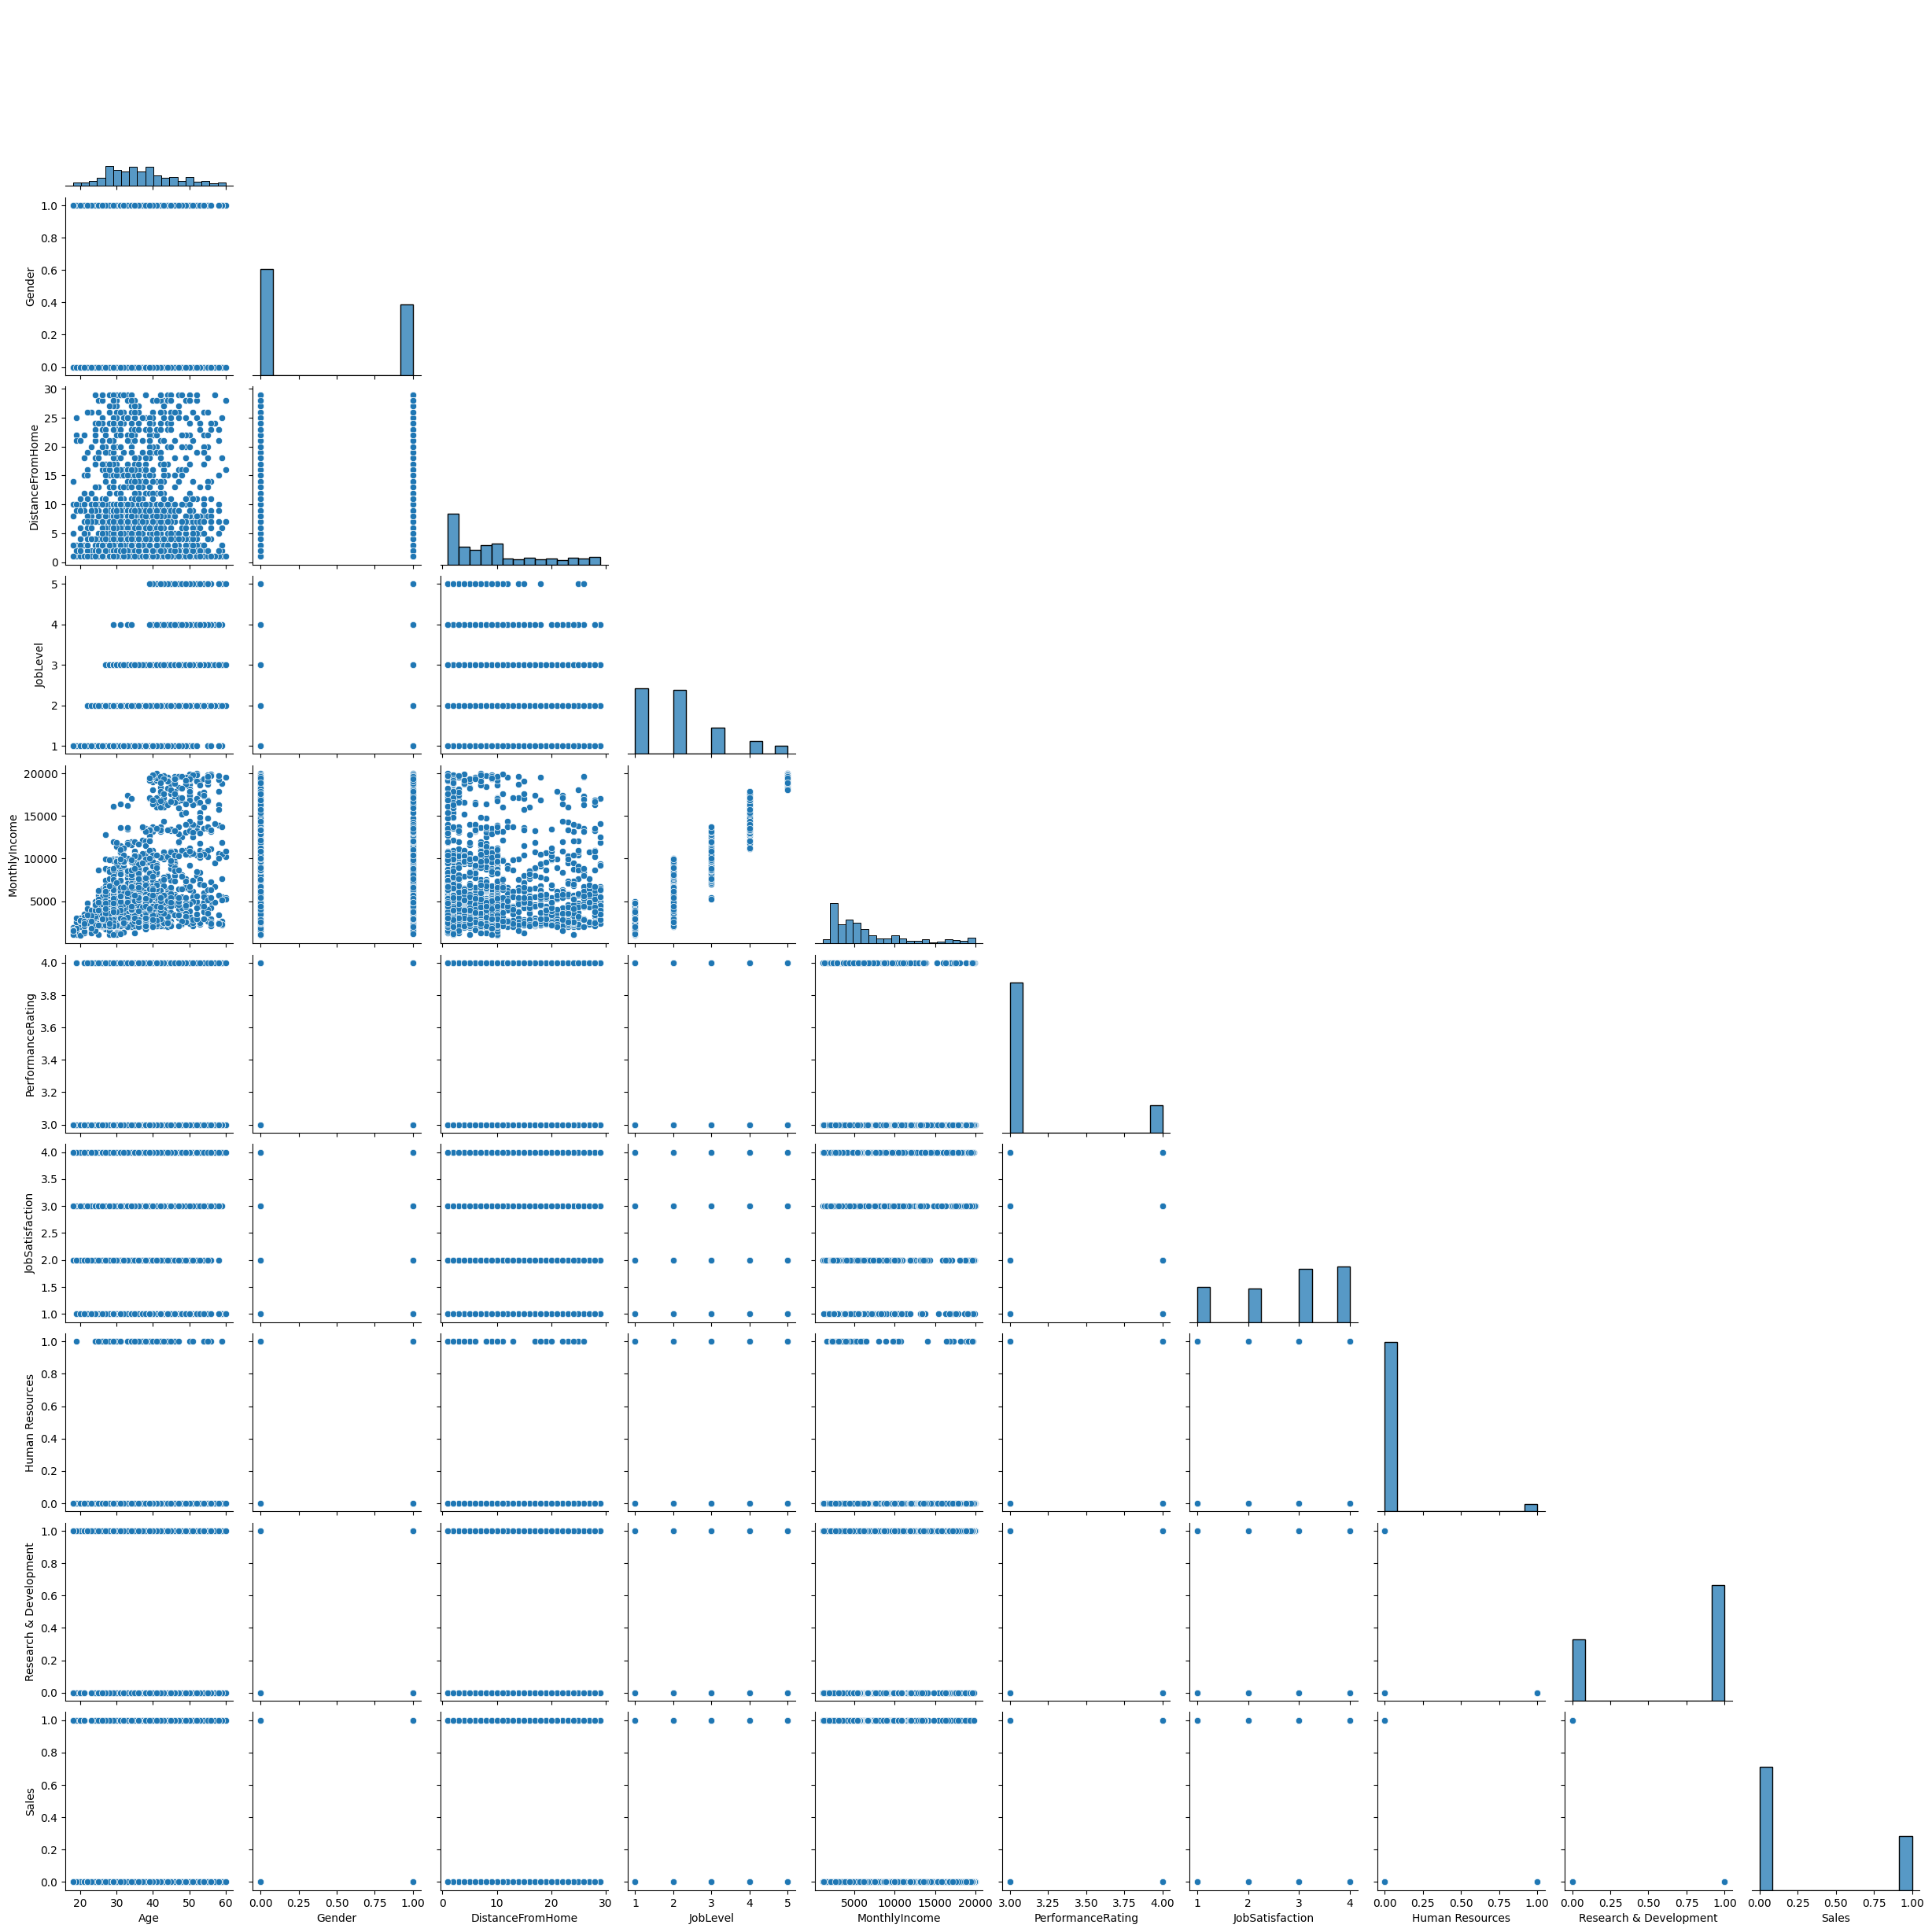

In [19]:
# create a pair plot comparing all the columns of the dataframe - what observations do you notice?
sns.pairplot(model_df, corner = True);

* MonthlyIncome and JobLevel have the most distinct relationship, which makes sense given that higher-level employees typically earn more.
* Similar for MontlyIcome and Age, which makes sense given that younger employees are most likely employed in lower level roles.
* Right-Skewed Features: Both Age, DistanceFromHome, and MonthlyIncome show a right-skewed distribution, indicating more employees in lower ranges for these features.
* Binary Features: Gender, Research & Development, and Sales create clear two-bar histograms.

## 2. K-Means Clustering

Let's segment the employees using K-Means clustering.

### a. Standardize the data

In [20]:
# Import StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler, which will normalize the data to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()

# Fit the scaler to the data and transform it, then convert the result back to a DataFrame
# This scales all features in model_df so that they are on the same scale
model_std = pd.DataFrame(scaler.fit_transform(model_df), columns=model_df.columns)

# Display the first few rows of the scaled data to verify the transformation
model_std.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-0.211604,-1.374051,1.515244
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,-0.211604,0.727775,-0.659960
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,-0.211604,0.727775,-0.659960
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-0.211604,0.727775,-0.659960
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,-0.211604,0.727775,-0.659960


In [21]:
# double check that all the column means are 0 and standard deviations are 1
model_std.describe()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,-4.350262e-17,4.350262e-17,-2.658493e-17,-4.471102e-17,-6.114534e-16,-9.183886e-17,6.767074e-17,2.900174e-17,8.458842e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-8.164966e-01,-1.010909e+00,-9.614864e-01,-1.167343e+00,-4.262300e-01,-1.567907e+00,-2.116037e-01,-1.374051e+00,-6.599598e-01
25%,-7.581700e-01,-8.164966e-01,-8.875151e-01,-9.614864e-01,-7.632087e-01,-4.262300e-01,-6.608532e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
50%,-1.011589e-01,-8.164966e-01,-2.705440e-01,-5.778755e-02,-3.365516e-01,-4.262300e-01,2.462002e-01,-2.116037e-01,7.277751e-01,-6.599598e-01
75%,6.653541e-01,1.224745e+00,5.932157e-01,8.459113e-01,3.986245e-01,-4.262300e-01,1.153254e+00,-2.116037e-01,7.277751e-01,1.515244e+00
max,2.526886e+00,1.224745e+00,2.444129e+00,2.653309e+00,2.867626e+00,2.346151e+00,1.153254e+00,4.725816e+00,7.277751e-01,1.515244e+00


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [22]:
def kmeans_plotter(model_df, k, n_init=10, random_state=42):
    """
    This function performs KMeans clustering for a range of cluster numbers (k), 
    calculates inertia and silhouette scores, and plots both.
    
    Parameters:
    - model_df: DataFrame of standardized features to cluster.
    - k: The maximum number of clusters to fit (the function starts from 2).
    - n_init: Number of initializations to run the algorithm for, default is 10.
    - random_state: Controls the randomness for reproducibility, default is 42.
    
    Returns:
    - Plots of inertia values and silhouette scores for each k.
    """
    
    # Import necessary libraries
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # Initialize lists to store inertia and silhouette scores
    inertia_values = []  # Stores inertia (within-cluster sum of squares) for each k
    silhouette_scores = []  # Stores silhouette scores for each k
    
    # Loop over the range of k values (from 2 to the specified maximum k)
    for i in range(2, k + 1):
        # Create and fit the KMeans model
        kmeans = KMeans(n_clusters=i, n_init=n_init, random_state=random_state)
        kmeans.fit(model_df)
        
        # Append the inertia value (measure of cluster compactness)
        inertia_values.append(kmeans.inertia_)
        
        # Append the silhouette score (measure of cluster separation)
        silhouette_scores.append(silhouette_score(model_df, kmeans.labels_, metric='euclidean'))
        
    # Create a Series for inertia values (to make plotting easier)
    inertia_series = pd.Series(inertia_values, index=range(2, k + 1))  # Use dynamic k
    
    # Plot the inertia values against the number of clusters
    inertia_series.plot(marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Number of Clusters vs. Inertia')
    plt.show()  # Display the plot

    # Create a Series for silhouette scores
    silhouette_series = pd.Series(silhouette_scores, index=range(2, k + 1))  # Use dynamic k
    
    # Plot the silhouette scores against the number of clusters
    silhouette_series.plot(marker='o', color='green')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Number of Clusters vs. Silhouette Score')
    plt.show()  # Display the plot

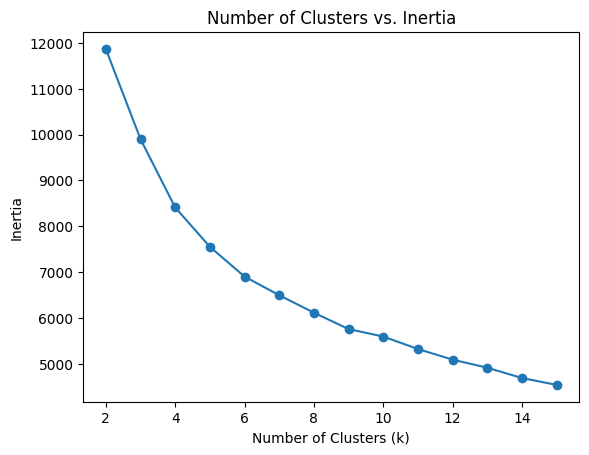

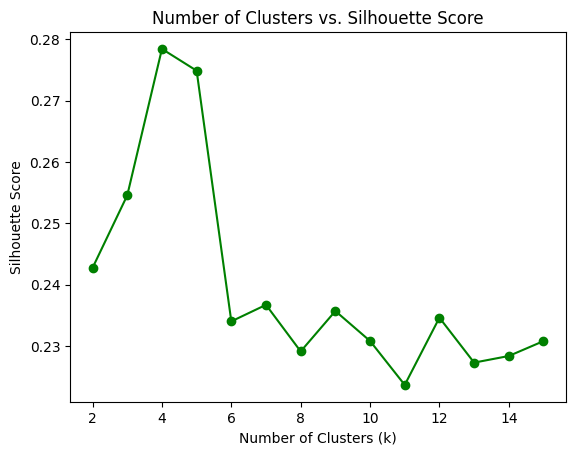

In [23]:
kmeans_plotter(model_std, 15)

### c. Identify a k value that looks like an elbow on the inertia plot and has a high silhouette score

Based on the inertia and silhouette score results, it looks like 4 clusters is a strong option:

**Inertia**: At 4 clusters, the inertia values stop decreasing as dramatically. This point suggests we are capturing the core structure in the data without over-complicating the model.

**Silhouette score**: The silhouette score for 4 clusters is 0.2784, which is the highest of all other cluster options, suggesting that that cluster separation is strongest at this point.

In [24]:
# fit a kmeans model for the k value that you identified k= 4

kmeans4 = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
kmeans4.fit(model_std)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [25]:
# find the number of employees in each cluster
pd.Series(kmeans4.labels_).value_counts()

0    747
1    407
2    253
3     63
Name: count, dtype: int64

In [26]:
# Create a DataFrame from the cluster centers of the KMeans model with 4 clusters
# kmeans4.cluster_centers_ contains the coordinates of the cluster centers in feature space
# This DataFrame will have the same columns as model_df to show the mean value of each feature for the cluster centers
cluster_c4 = pd.DataFrame(kmeans4.cluster_centers_, columns=model_df.columns)

# Display the DataFrame containing the cluster centers
cluster_c4

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,-0.247161,-0.032245,0.005648,-0.544115,-0.534532,0.026555,-0.001509,-0.211604,0.727775,-0.659960
1,-0.170573,0.031095,0.041125,-0.006719,-0.102924,-0.051584,0.034480,-0.211604,-1.374051,1.515244
2,0.980010,0.087136,-0.067651,1.624593,1.735798,0.012091,-0.022689,-0.211604,0.403778,-0.324652
3,0.096987,-0.168483,-0.060970,-0.029099,0.032207,-0.030176,-0.113742,4.725816,-1.374051,-0.659960


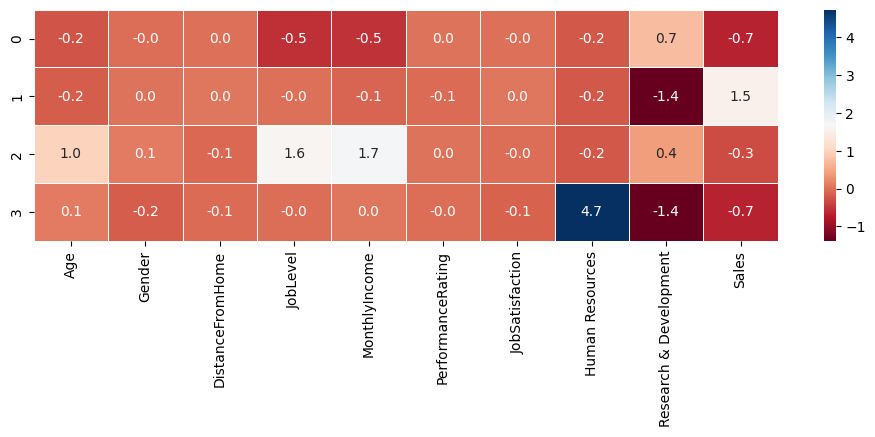

In [27]:
# Create a figure for the heatmap with specified dimensions (12 inches wide by 3 inches tall)
plt.figure(figsize=(12, 3)) 

# Plot a heatmap of the cluster centers (cluster_c4)
# - annot=True: displays the values inside the heatmap cells
# - cmap='RdBu': color map that ranges from red to blue, highlighting high and low values
# - fmt='.1f': formats the numbers with one decimal place
# - linewidths=.5: adds a small line between cells to separate them visually
sns.heatmap(cluster_c4,
            annot=True,
            cmap='RdBu',
            fmt='.1f',
            linewidths=.5
           );

#### interpret the clusters

* **cluster 0**: Junior, Low Salary, R&D Employees
* **cluster 1**: Sales Employees
* **cluster 2**: Senior High Level Employees
* **cluster 3**: HR Employees

## 3. PCA

Let's visualize the data using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [28]:
# fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(model_std)

PCA(n_components=2)

In [29]:
# View the explained variance ratio of each principal component
pca.explained_variance_ratio_

# The current explained variance is 43%, which means that only 43% of the data's variance
# is captured by the selected number of principal components. 
# This is relatively low and indicates that the PCA transformation may not be effectively summarizing the data.

array([0.23793893, 0.18883434])

In [30]:
# Create a DataFrame from the PCA components
# pca.components_ contains the principal axes (or components) for each feature in the data
# Each row in pca_df corresponds to one principal component, and the columns are the original features
# The values in the DataFrame show how much each feature contributes to each principal component
pca_df = pd.DataFrame(pca.components_, columns=model_std.columns)

# Display the DataFrame of principal components to interpret the contributions of each feature
pca_df

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,0.432874,0.048776,-0.002851,0.605093,0.594450,-0.025565,-0.004727,0.029644,-0.213929,0.208338
1,0.213848,-0.008409,-0.016533,0.145333,0.177301,0.041532,-0.011404,-0.113744,0.678872,-0.652462


In [31]:
# PC 1 (row O): higher values = Job level (0.605), Monthly Income (0.594), Age (0.433), lower values = R&D (-0.214)
# PC 2 (row 1): higher values = R&D (0.679), lower values = Sales (-0.652)

### b. Overlay the K-Means cluster colors

In [32]:
# Apply the PCA transformation to the standardized data (model_std)
# pca.transform(model_std) projects the original data onto the principal components, reducing its dimensionality
# The result is a DataFrame where each row is the original data, but now represented by the first two principal components (PC1, PC2)
df_scaled_transformed = pd.DataFrame(pca.transform(model_std), columns=['PC1', 'PC2'])

df_scaled_transformed.head()

,PC1,PC2
0,0.765263,-1.853973
1,-0.031684,1.285674
2,-1.462588,0.645564
3,-1.449531,0.563547
4,-1.758252,0.473654


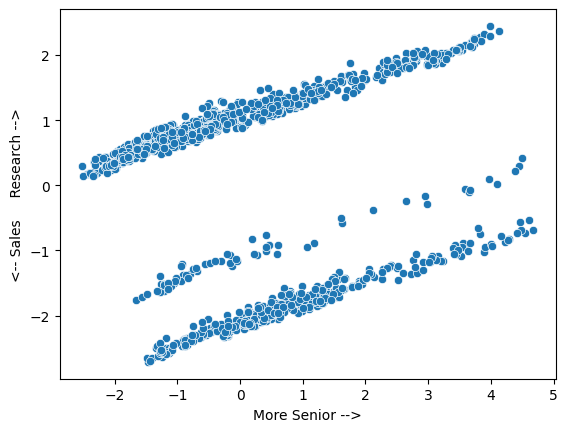

In [33]:
# Import the necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot using the first two principal components (PC1 and PC2)
# This plots each data point in the reduced 2D space defined by PC1 and PC2
sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed)

# Set the x-axis label to indicate the interpretation of PC1 
plt.xlabel('More Senior -->')

# Set the y-axis label to indicate the interpretation of PC2 
plt.ylabel('<-- Sales     Research -->');

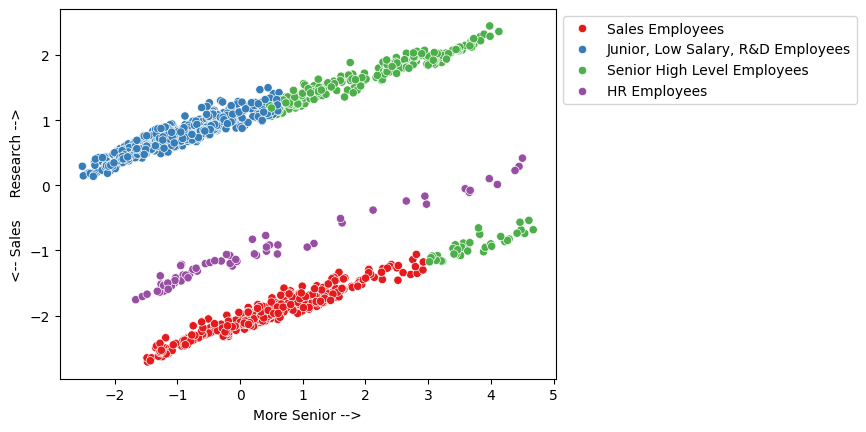

In [34]:
# Define a dictionary that maps cluster labels (numeric) to descriptive cluster names
labels = {
    0: 'Junior, Low Salary, R&D Employees',
    1: 'Sales Employees',
    2: 'Senior High Level Employees',
    3: 'HR Employees'
}

# Create a new column in df_scaled_transformed called 'Cluster_Label'
# This maps the numeric cluster labels from kmeans4.labels_ to the descriptive names using the 'labels' dictionary
df_scaled_transformed['Cluster_Label'] = pd.Series(kmeans4.labels_).map(labels)

# Create a scatter plot of the first two principal components (PC1 and PC2)
# Set the hue to be the 'Cluster_Label' to color the points according to the assigned clusters
# Use the 'Set1' palette for distinct colors
sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed, hue='Cluster_Label', palette='Set1')

# Set the x-axis and y-axis labels
plt.xlabel('More Senior -->')
plt.ylabel('<-- Sales     Research -->')

# Position the legend at the upper left outside the plot area using bbox_to_anchor
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

### c. Overlay the Department colors instead

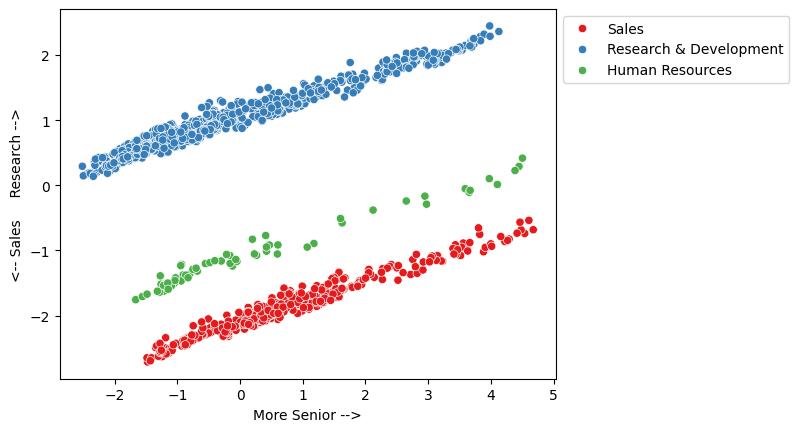

In [35]:
# Create a scatter plot of the first two principal components (PC1 and PC2)
# Set the hue to be the 'Department' column from employee_df to color the points based on department
# Use the 'Set1' color palette for distinct department colors
sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed, hue=employee_df.Department, palette='Set1')

# Set the x-axis and y-axis labels
plt.xlabel('More Senior -->')
plt.ylabel('<-- Sales     Research -->')

# Position the legend at the upper left outside the plot area using bbox_to_anchor
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

## 4. K-Means Clustering: Round 2

Since the departments seemed to dominate the visualization, let's exclude them and try fitting more K-Means models.

### a. Create a new dataframe without the Departments

In [36]:
# create a new dataframe that excludes the three department columns from the scaled dataframe
no_dept_std = model_std.iloc[:, :-3]
no_dept_std.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [37]:
# Create a new DataFrame by excluding the last three columns (assumed to be department-related columns) from the standardized data (model_std)
# iloc[:, :-3] selects all rows (:) and all columns except the last three (:-3)
no_dept_std = model_std.iloc[:, :-3]

### c. Identify a few k values that looks like an elbow on the inertia plot and have a high silhouette score

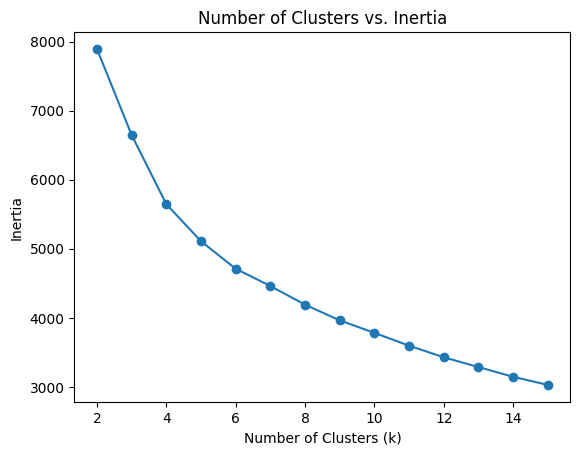

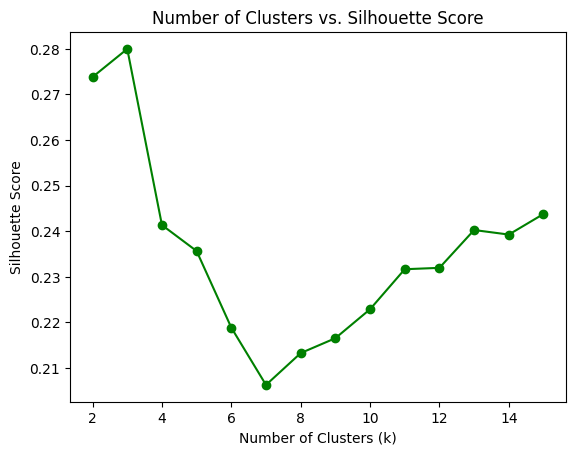

In [38]:
kmeans_plotter(no_dept_std, 15)

In [39]:
# potential k values that my be a good fit: 3, 4 and 6

#### i. k = 3

In [40]:
def kmeans_fitter(model_df, k, n_init=10, random_state=42):
    """
    Fits a KMeans model with k clusters, returns a counter of cluster membership 
    sorted by cluster index, and plots a heatmap of cluster centers.
    
    Parameters:
    - model_df: DataFrame of features for clustering
    - k: Number of clusters
    - n_init: Number of initializations (default is 10)
    - random_state: Random seed for reproducibility (default is 42)
    
    Returns:
    - counter: A Series showing the number of data points in each cluster, sorted by cluster label
    """
    
    from sklearn.cluster import KMeans
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Fit the KMeans model
    kmeans_k = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
    kmeans_k.fit(model_df)
    
    # Create a counter of the number of points in each cluster, sorted by cluster index
    counter = pd.Series(kmeans_k.labels_).value_counts().sort_index()  # Sort by cluster label (index)
    
    # Create a DataFrame for the cluster centers
    cluster_k = pd.DataFrame(kmeans_k.cluster_centers_, columns=model_df.columns)
    
    # Plot the heatmap of cluster centers
    plt.figure(figsize=(12, 3)) 
    sns.heatmap(cluster_k, annot=True, cmap='RdBu', fmt='.1f', linewidths=.5)
    plt.show()
    
    return counter

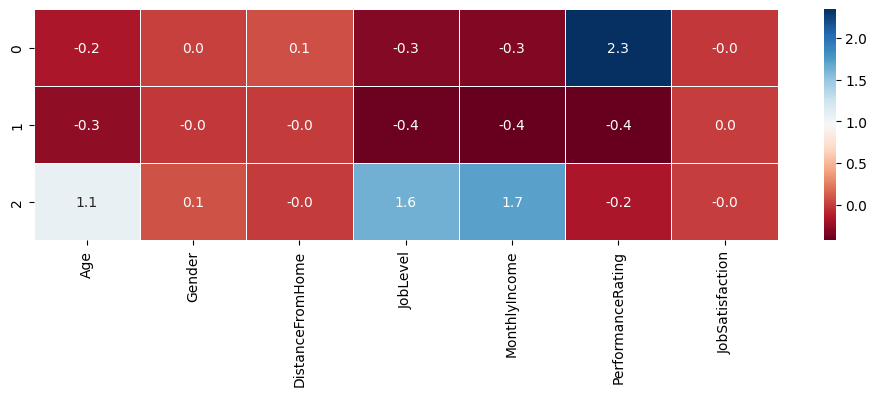

0    200
1    988
2    282
Name: count, dtype: int64

In [41]:
# fit a kmeans model for the k value that you identified
kmeans_fitter(no_dept_std, 3)

#### interpret the clusters

* **cluster 0**: High Performancer with entry jobs with lower salary **Top Performers**
* **cluster 1**: Young entry jobs with lower salary and performance rating **Early-Career Employees with Lower Performance**
* **cluster 2**: Senior employees with higher job levels and salaries **Experienced Employees**

#### ii. k = 4

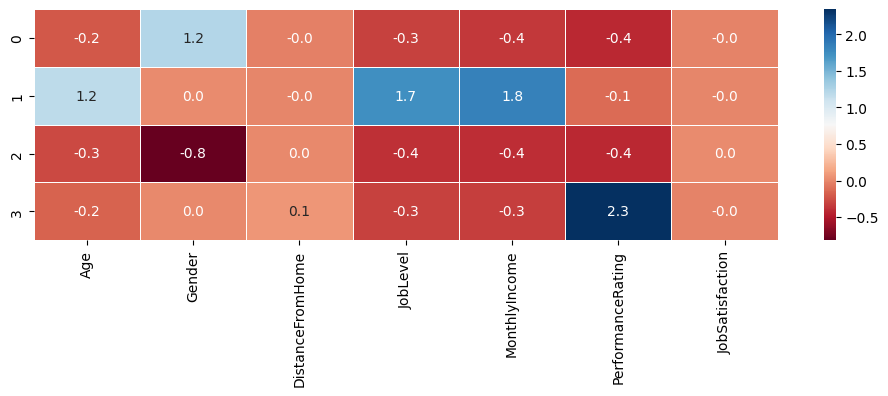

0    405
1    249
2    616
3    200
Name: count, dtype: int64

In [42]:
# fit a kmeans model for the k value that you identified
kmeans_fitter(no_dept_std, 4)

#### interpret the clusters
* **cluster 0**: Young female employees with entry jobs with lower salary and performance rating **Early-Career Female Employees with Lower Performance**
* **cluster 1**: Senior employees with higher job levels and salaries **Experienced Employees**
* **cluster 2**: Young male employees with entry jobs with lower salary and performance rating **Early-Career Male Employees with Lower Performance**
* **cluster 3**: High Performancer with entry jobs with lower salary **Top Performers**

#### iii. k = 6

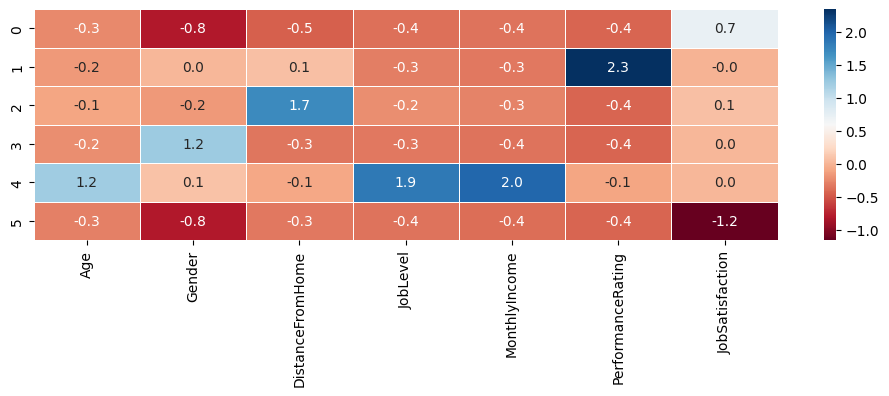

0    304
1    200
2    197
3    349
4    219
5    201
Name: count, dtype: int64

In [43]:
# fit a kmeans model for the k value that you identified
kmeans_fitter(no_dept_std, 6)

#### interpret the clusters
* **cluster 0**: Young male employees with high job satisfaction **Content Male Professionals**
* **cluster 1**: High Performancer with entry jobs with lower salary **Top Performers**
* **cluster 2**: Employees living far away from work **Far Commuting Employees**
* **cluster 3**: Female employees with lower salary and performance rating **Underutilized Female Employees**
* **cluster 4**: Senior employees with higher job levels and salaries **Experienced Employees**
* **cluster 5**: Young male employees with very low job satisfaction **Discontent Male Employees**

## 5. PCA: Round 2

Let's visualize the data (without Departments) using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [44]:
# Import the PCA class from sklearn's decomposition module
from sklearn.decomposition import PCA

# Create a PCA model that reduces the data to 2 principal components
# n_components=2 means that we are reducing the dimensionality to 2 components
pca_nodept = PCA(n_components=2)

# Fit the PCA model to the data (no_dept_std), which excludes the department columns
# This finds the directions of maximum variance in the dataset and computes the principal components
pca_nodept.fit(no_dept_std)

PCA(n_components=2)

In [45]:
# View the explained variance ratio after applying PCA to the data without the 'Department' feature
pca_nodept.explained_variance_ratio_

# The explained variance is now 48%, which is slightly better than the previous 43%.
# While it's an improvement, 48% is still not ideal, as more than half of the data's variance
# remains unexplained. Additional components or a different dimensionality reduction approach
# may be necessary to capture a more significant portion of the variance.

array([0.33354222, 0.14850324])

In [46]:
# Create a DataFrame from the components of the PCA model (pca_nodept)
# pca_nodept.components_ contains the principal components (or directions of maximum variance) found by the PCA model
# Each row represents a principal component, and the columns correspond to the original features (from no_dept_std)
# The values in the DataFrame indicate how much each feature contributes to the corresponding principal component
pca_nodept_df = pd.DataFrame(pca_nodept.components_, columns=no_dept_std.columns)

# Display the DataFrame to interpret how each feature contributes to the two principal components
pca_nodept_df

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.471243,0.046063,-0.006297,0.623931,0.621404,-0.016880,-0.007127
1,0.018969,0.586159,0.414054,-0.018388,-0.027781,0.483317,-0.499911


In [47]:
# PC 1 (row O): higher values = Age (0.471), Monthly Income (0.6214), Job Level (0.624)
# PC 2 (row 1): higher values = Female (0.586), Performance Rating (0.4833), More Commuting (0.141) lower values = Job Satisfaction (-0.499)

### b. Overlay the K-Means cluster colors

In [48]:
# Apply the PCA transformation to the no_dept_std data (which excludes department columns)
# pca_nodept.transform(no_dept_std) projects the original standardized data onto the two principal components (PC1 and PC2)
# This reduces the dimensionality of the data while preserving as much variance as possible
no_dept_std_transformed = pd.DataFrame(pca_nodept.transform(no_dept_std), columns=['PC1', 'PC2'])

no_dept_std_transformed.head()

,PC1,PC2
0,0.168712,-0.470665
1,0.334248,0.959030
2,-1.205213,-1.131272
3,-1.210236,0.103169
4,-1.532824,-0.706731


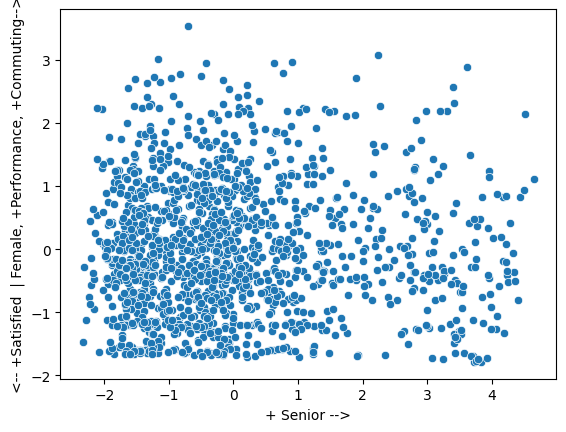

In [49]:
# plot the data

sns.scatterplot(x='PC1', y='PC2', data=no_dept_std_transformed)
plt.xlabel('+ Senior -->')
plt.ylabel('<-- +Satisfied  | Female, +Performance, +Commuting-->');

In [50]:
# overlay the kmeans clusters (choose your favorite k-means model from the previous section)
kmeans6 = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans6.fit(no_dept_std)

KMeans(n_clusters=6, n_init=10, random_state=42)

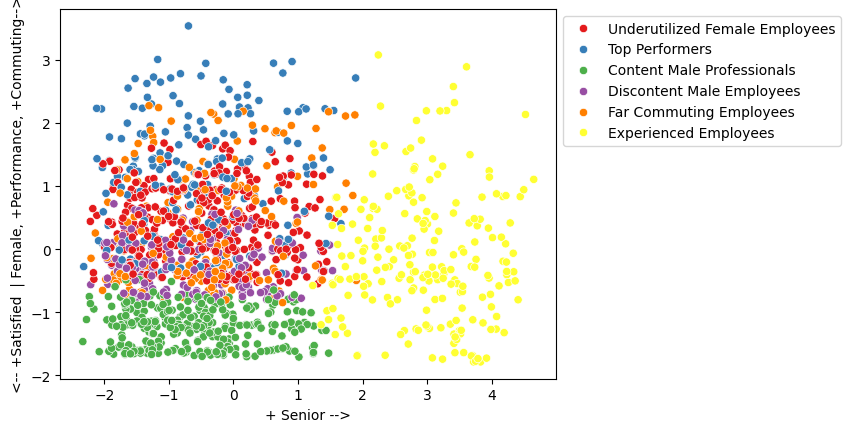

In [51]:
# Create a dictionary that maps each cluster label (numeric) from the KMeans model to descriptive labels
labels_new = {
    0: 'Content Male Professionals',
    1: 'Top Performers',
    2: 'Far Commuting Employees',
    3: 'Underutilized Female Employees',
    4: 'Experienced Employees',
    5: 'Discontent Male Employees'
}

# Add a new column to no_dept_std_transformed, called 'Cluster_Label'
# This column maps the numeric cluster labels (kmeans6.labels_) to their corresponding descriptive labels from the labels_new dictionary
no_dept_std_transformed['Cluster_Label'] = pd.Series(kmeans6.labels_).map(labels_new)

# Create a scatter plot using the first two principal components (PC1 and PC2)
# Set the hue to 'Cluster_Label' to color the points by their assigned cluster label
# Use the 'Set1' color palette for distinct colors for each cluster
sns.scatterplot(x='PC1', y='PC2', data=no_dept_std_transformed, hue='Cluster_Label', palette='Set1')

# Set the x-axis and label, indicating the interpretation of PC1 and PC2 
plt.xlabel('+ Senior -->')
plt.ylabel('<-- +Satisfied  | Female, +Performance, +Commuting-->')

# Position the legend at the upper left, outside the plot area using bbox_to_anchor
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

### c. OPTIONAL: Create a 3D plot

In [52]:
# Create a PCA model that reduces the data to 3 principal components
pca_nodept_3 = PCA(n_components=3)

# Fit the PCA model to the no_dept_std data (the standardized data without department columns)
pca_nodept_3.fit(no_dept_std)

PCA(n_components=3)

In [53]:
# View the explained variance ratio for the 3 principal components
pca_nodept_3.explained_variance_ratio_

# The 3 components explain 62.8% of the data, which is a significant improvement compared to previous results(43% and 48%). 
# This means that these three components are capturing a much larger portion of the data's
# variability, making the dimensionality reduction more effective.

array([0.33354222, 0.14850324, 0.14578114])

In [54]:
# Create a DataFrame from the components of the PCA model with 3 components
# Each row represents one of the 3 principal components, and the columns correspond to the original features in no_dept_std
pca_nodept_3_df = pd.DataFrame(pca_nodept_3.components_, columns=no_dept_std.columns)

pca_nodept_3_df

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.471243,0.046063,-0.006297,0.623931,0.621404,-0.016880,-0.007127
1,0.018969,0.586159,0.414054,-0.018388,-0.027781,0.483317,-0.499911
2,0.027030,-0.363136,0.554884,0.021596,0.010652,0.520500,0.536661


In [55]:
# interpret the components
# PC 1 (row O): higher values = Age (0.471), Monthly Income (0.6214), Job Level (0.624 = More Senior
# PC 2 (row 1): higher values = More Commuting (0.414), Performance (0.483), Female (0.58), lower values = Satisfaction(-0.5)
# PC 3 (row 2): higher values = More Commuting (0.555), Performance Rating (0.52), Job Satiosfaction (0.537) Lower values = Male (-0.36)

In [56]:
# Apply the PCA transformation to the no_dept_std data to project it onto 3 principal components (PC1, PC2, and PC3)
no_dept_std3_transformed = pd.DataFrame(pca_nodept_3.transform(no_dept_std), columns=['PC1', 'PC2', 'PC3'])

# Display the first few rows of the transformed data to verify the projection onto the three principal components
no_dept_std3_transformed.head()

,PC1,PC2,PC3
0,0.168712,-0.470665,-0.598970
1,0.334248,0.959030,1.112754
2,-1.205213,-1.131272,-0.316222
3,-1.210236,0.103169,-0.998987
4,-1.532824,-0.706731,-0.829482


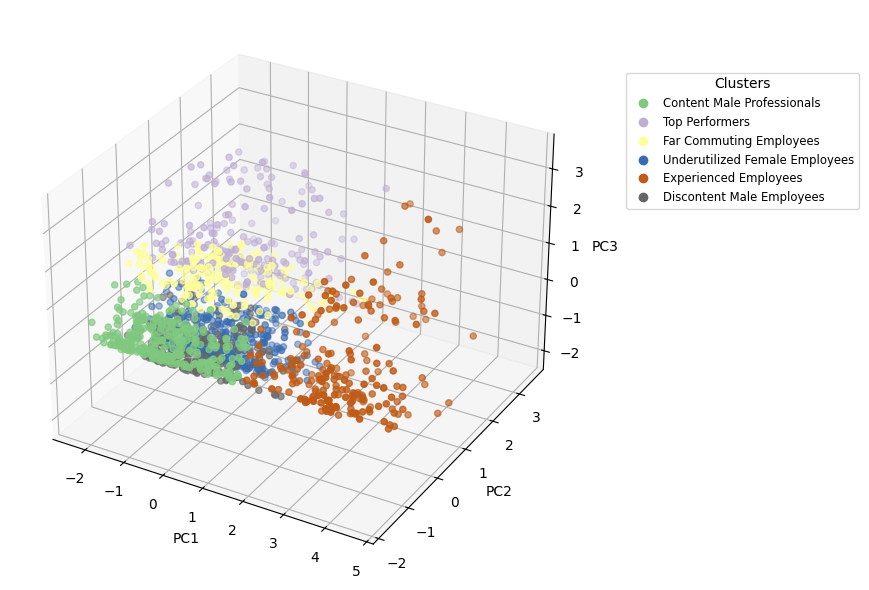

In [57]:
# create a 3d scatter plot
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

labels_new = {
    0: 'Content Male Professionals',
    1: 'Top Performers',
    2: 'Far Commuting Employees',
    3: 'Underutilized Female Employees',
    4: 'Experienced Employees',
    5: 'Discontent Male Employees'
}

# Map the numeric labels to your cluster labels
no_dept_std3_transformed['Cluster_Label'] = pd.Series(kmeans6.labels_).map(labels_new)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')  # Use 3D projection

# Use the numeric cluster labels (kmeans6.labels_) for coloring
sc = ax.scatter(no_dept_std3_transformed['PC1'], no_dept_std3_transformed['PC2'], no_dept_std3_transformed['PC3'],
                c=kmeans6.labels_, cmap='Accent')

# Set axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a color legend based on the numeric cluster labels, using the custom labels for the legend
handles, _ = sc.legend_elements()
custom_labels = [labels_new[i] for i in range(len(labels_new))]
plt.legend(handles, custom_labels, title='Clusters', bbox_to_anchor=(1.5, 0.9), fontsize='small')  # Adjust legend position

# Use tight_layout to make better use of space
plt.tight_layout()

# Show the plot
plt.show()

## 6. EDA on Clusters

Let's decide to go with the 6 clusters without department data.

### a. Confirm the 6 clusters

In [58]:
# fit a kmeans model with 6 clusters
kmeans6 = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans6.fit(no_dept_std)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [59]:
# view the cluster labels
kmeans6.labels_

array([3, 1, 0, ..., 1, 5, 0], dtype=int32)

In [60]:
# Create a DataFrame from the KMeans cluster labels (kmeans6.labels_)
results_df = pd.DataFrame(kmeans6.labels_)  

# Rename the column from its default name to 'Cluster_Label' for clarity
results_df.columns = ['Cluster_Label']

# Display the DataFrame to verify the column renaming
results_df

,Cluster_Label
0,3
1,1
2,0
3,3
4,5
...,...
1465,2
1466,5
1467,1
1468,5


### b. Create a dataframe with the cluster labels and names

In [61]:
# create a dataframe with two columns - one of the label and another of the cluster name
cluster_label_dict = {
    0: 'Content Male Professionals',
    1: 'Top Performers',
    2: 'Far Commuting Employees',
    3: 'Underutilized Female Employees',
    4: 'Experienced Employees',
    5: 'Discontent Male Employees'
}

# Add a new column 'Cluster_Description' with corresponding label descriptions
results_df['Cluster_Description'] = results_df['Cluster_Label'].map(cluster_label_dict)
results_df.head()

,Cluster_Label,Cluster_Description
0,3,Underutilized Female Employees
1,1,Top Performers
2,0,Content Male Professionals
3,3,Underutilized Female Employees
4,5,Discontent Male Employees


### c. View the attrition rates for each cluster

In [62]:
# Combine the clusters data in results_df with the 'Attrition' column from emp_prep_df
# Use merge with left_index=True and right_index=True to merge the DataFrames on their indices
# This adds the 'Attrition' column to the results_df DataFrame
results_df = results_df.merge(emp_prep_df[['Attrition']], left_index=True, right_index=True)

results_df.head()

,Cluster_Label,Cluster_Description,Attrition
0,3,Underutilized Female Employees,1
1,1,Top Performers,0
2,0,Content Male Professionals,1
3,3,Underutilized Female Employees,0
4,5,Discontent Male Employees,0


In [63]:
# Group the data by 'Cluster_Description' and calculate the mean of the 'Attrition' column for each cluster
# This computes the attrition rate for each cluster
# sort_values(ascending=False) sorts the results in descending order, showing clusters with the highest attrition rate first
results_df.groupby('Cluster_Description')['Attrition'].mean().sort_values(ascending=False)

Cluster_Description
Far Commuting Employees           0.218274
Discontent Male Employees         0.189055
Top Performers                    0.185000
Content Male Professionals        0.161184
Underutilized Female Employees    0.154728
Experienced Employees             0.073059
Name: Attrition, dtype: float64

In [64]:
# find the number of employees in each cluster
results_df.Cluster_Description.value_counts()

Cluster_Description
Underutilized Female Employees    349
Content Male Professionals        304
Experienced Employees             219
Discontent Male Employees         201
Top Performers                    200
Far Commuting Employees           197
Name: count, dtype: int64

#### interpret the findings
* Far Commuting Employees are most likely to leave
* Experienced Exployees are most likely to stay

### d. View the department breakdown for each cluster

In [65]:
# Combine the clusters data in results_df with the 'Department' column from employee_df
# Use merge with left_index=True and right_index=True to merge the DataFrames on their indices
# This adds the 'Department' column to the results_df DataFrame
results_df = results_df.merge(employee_df.Department, left_index=True, right_index=True)

In [66]:
# what is the attrition rate for each cluster + department combination?
# Group the data by 'Cluster_Description' and 'Department', then calculate the mean attrition rate for each combination
# sort_values(ascending=False) sorts the attrition rates in descending order to show the highest attrition combinations first
# reset_index() is used to convert the grouped result back into a DataFrame with a proper index
results_by_clust_dept = results_df.groupby(['Cluster_Description', 'Department'])['Attrition'].mean().sort_values(ascending=False).reset_index()

results_by_clust_dept

,Cluster_Description,Department,Attrition
0,Far Commuting Employees,Human Resources,0.666667
1,Far Commuting Employees,Sales,0.311475
2,Underutilized Female Employees,Human Resources,0.300000
3,Discontent Male Employees,Sales,0.215385
4,Discontent Male Employees,Human Resources,0.214286
5,Underutilized Female Employees,Sales,0.206897
6,Content Male Professionals,Sales,0.193548
7,Top Performers,Research & Development,0.188406
8,Top Performers,Sales,0.181818
9,Discontent Male Employees,Research & Development,0.172131


#### interpret the findings
* Far Commuting Employees have the highest risk of leaving, especially in HR and Sales departments
* The lowest risk of leaving is found among Experienced Employees working in R&D and HR

In [67]:
# find the number of employees in each cluster + department combo
results_df.groupby(['Cluster_Description', 'Department']).count()

Cluster_Label  \
Cluster_Description            Department                              
Content Male Professionals     Human Resources                    14   
                               Research & Development            197   
                               Sales                              93   
Discontent Male Employees      Human Resources                    14   
                               Research & Development            122   
                               Sales                              65   
Experienced Employees          Human Resources                    12   
                               Research & Development            151   
                               Sales                              56   
Far Commuting Employees        Human Resources                     6   
                               Research & Development            130   
                               Sales                              61   
Top Performers                 Human Resources                     7   
                               Research & Development            138   
                               Sales                              55   
Underutilized Female Employees Human Resources                    10   
                               Research & Development            223   
                               Sales                             116   

                                                       Attrition  
Cluster_Description            Department                         
Content Male Professionals     Human Resources                14  
                               Research & Development        197  
                               Sales                          93  
Discontent Male Employees      Human Resources                14  
                               Research & Development        122  
                               Sales                          65  
Experienced Employees          Human Resources                12  
                               Research & Development        151  
                               Sales                          56  
Far Commuting Employees        Human Resources                 6  
                               Research & Development        130  
                               Sales                          61  
Top Performers                 Human Resources                 7  
                               Research & Development        138  
                               Sales                          55  
Underutilized Female Employees Human Resources                10  
                               Research & Development        223  
                               Sales                         116

## 7. Make Recommendations

* **Far Commuting employees** - This group has the highest attrition rate among all clusters, likely due to the strain of long commutes. Commuting time can contribute to stress, fatigue, and decreased job satisfaction, making employees more likely to leave for jobs closer to home or offering remote working opportunities. Addressing the long commute issue is key to reducing attrition. Remote or hybrid work arrangements would be the most effective solution, followed by relocation support and flexible working hours. Commuting benefits and occasional work-from-anywhere options could also help make long commutes more manageable and improve retention in this cluster.
* **Discontent Male Employees** - This group has low job satisfaction, which is reflected in their relatively high attrition rate. we need to identify the specific reasons behind their dissatisfaction and address them (e.g., lack of career growth, work-life balance, management issues).
* **Top Performers** - Although they are top performers, they still show relatively high attrition. We should make sure that Top Performers stay motivated and committed. We need to ensure these employees feel appreciated for their contributions with regular recognition (both monetary and non-monetary incentives).
* **Content Male Professional** - While job satisfaction is high, there is still a risk of attrition. Regular check-ins shoudl be performed to ensure engagement remains high will help. We can offer personalized development opportunities to keep them motivated.
* **Underutilized Female Employees** - Female employees have moderate attrition rates, likely linked to job challenges and career frustrations (e.g., lower performance ratings and monthly salary). Providing opportunities for skill development and building confidence in their roles could help them progress to higher-paid positions.
* **Experienced Employees** - While attrition is low, experienced employees may feel stagnant in their roles, which could lead to future attrition. We could  involve these employees in mentoring programs or knowledge-sharing initiatives to give them a sense of purpose and importance. We could also offer benefits that cater to senior employees' needs (e.g., enhanced retirement plans, healthcare perks, or phased retirement options).